In [20]:
import json as json
import pprint as pp
from operator import itemgetter

All submissions < 4 seconds are bogus since the attack starts at 4

In [21]:
all_submissions=[]
no_time=[]
results=[]
fast_submit=[]


with open("processed_results.txt") as f:
        all_submissions = json.load(f, encoding='utf8')

results = [ r for r in all_submissions if r['counters']['all_changes'] > 0]
no_ops = [ r for r in all_submissions if r['counters']['all_changes'] == 0]
fast_submit=[ r for r in all_submissions if r['time'] < 4 ]

results = [r for r in results if r not in fast_submit and r['time']] #last one is a duplicate same user


results = sorted(results, key=itemgetter('rev'), reverse=True) #sort results based on revenue

print("all:", len(all_submissions))

print("results:", len(results))
print("No changes applied:",len(no_ops))

all: 48
results: 36
No changes applied: 11


We have only 10 valid results that recorded the runtime.

Now we compare the results with the base topologies and see what has changed:

In [22]:
def make_latex_table(net_type):
    if net_type > 0:
        res=[r for r in results if r['net_type'] == net_type]
    else:
        res=[r for r in results]
        
    sep = " & "
    newline = "\\\\ \\hline"
    
    for r in res:
        r['ranks'] = r['cost_ratio'] - r['rev']
    res = sorted(res, key=itemgetter('ranks'), reverse=False)
    
    for c, r in enumerate(res):
        r['rank']=c+1 


    print("rank & recovery & cost &  changes & state & rate up & rate down & filter \\\ \\hline")
    for r in res:
            #print(r['_0_init'], end = sep)
            print(str(r['user']), end = sep)
            #print(str(r['time']), end = sep)
            
            print(r['rank'], end = sep)
            print(str(r['revenue']), end = sep)
            print(str(r['cost_ratio']), end = sep)
            r = r['counters']
            print(r['all_changes'], end = sep)
            print(r['state_changes'], end = sep)
            print(r['rateup'], end = sep)
            print(r['ratedown'], end = sep)
            print(r['filter_changes'], end = " ")
            print(newline)

In [23]:
make_latex_table(1)

rank & recovery & cost &  changes & state & rate up & rate down & filter \\ \hline
8c5df4821f8832d1ed098af684103ee4 & 1 & 215.739099 & 103 & 20 & 0 & 12 & 8 & 0 \\ \hline
50af24ff94d5f965a68337d8c1707e2c & 2 & 212.919187 & 112 & 14 & 2 & 6 & 2 & 4 \\ \hline
adac485924f1326f4a2e615074e98079 & 3 & 203.57839075 & 108 & 3 & 0 & 0 & 0 & 3 \\ \hline
23847fa77f43100385baddfa015d0ccf & 4 & 184.58902225 & 100 & 6 & 4 & 0 & 0 & 2 \\ \hline
f448b6209b4ba236ea34e808c13eff94 & 5 & 227.62580524999998 & 126 & 16 & 2 & 6 & 0 & 8 \\ \hline
9f9c89c240b41a35b70d5d81a70f8ac8 & 6 & 223.55096812499994 & 127 & 16 & 0 & 2 & 4 & 10 \\ \hline
1f930757ac2536166062c3be820bf6b3 & 7 & 231.56065 & 132 & 16 & 0 & 4 & 2 & 10 \\ \hline
4032df9512fa55cc67f3bc56b9d7872a & 8 & 156.97172899999998 & 100 & 6 & 2 & 0 & 2 & 2 \\ \hline
f24c277a1ce5f56a54d3edf0e11d3ff6 & 9 & 182.96139862500002 & 114 & 10 & 0 & 10 & 0 & 0 \\ \hline
1fff4a9672ea9ed232e70703a9c45070 & 10 & 224.156344 & 133 & 16 & 0 & 8 & 0 & 8 \\ \hline
31ded17092

In [24]:
make_latex_table(2)

rank & recovery & cost &  changes & state & rate up & rate down & filter \\ \hline
38d1ac9b11c923e424eadd18024ad2b9 & 1 & 217.37450899999996 & 98 & 12 & 0 & 0 & 10 & 2 \\ \hline
b8db1b0d7f8e50a095a419b7e0f04134 & 2 & 236.39726125 & 119 & 6 & 0 & 2 & 0 & 4 \\ \hline
6f1e0e7a690aae61b6951c619a3edaa5 & 3 & 235.896702 & 119 & 6 & 0 & 2 & 0 & 4 \\ \hline
ed48788923d6c693234a935c351918f9 & 4 & 233.951043 & 119 & 6 & 0 & 2 & 0 & 4 \\ \hline
d16e6a331d45d3803c9d2d55720d5c7f & 5 & 200.31256574999998 & 97 & 6 & 0 & 0 & 4 & 2 \\ \hline
ae936a28139a686085a9f9fe0b893675 & 6 & 222.34240400000002 & 123 & 6 & 0 & 0 & 0 & 6 \\ \hline
d12b6f792311511fdc10d00acb9b2330 & 7 & 216.652984625 & 121 & 8 & 0 & 4 & 0 & 4 \\ \hline
187cdd0655fa539ba73bfc6777ec2542 & 8 & 196.84872149999998 & 121 & 30 & 4 & 20 & 6 & 0 \\ \hline
dd2fe56ede143fd1bc7dc49c0d43dd81 & 9 & 144.01444025 & 96 & 10 & 4 & 4 & 2 & 0 \\ \hline
674f31346b837d5339ab85fd5ea022f5 & 10 & 189.23741875000002 & 130 & 8 & 0 & 0 & 0 & 8 \\ \hline
aa884da

In [25]:
%matplotlib inline

def draw_change_plot(net_type, filename=None):
    import matplotlib.pyplot as plt
    from numpy import nan
    
    if net_type > 0:
        res=[r for r in results if r['net_type'] == net_type]
    else:
        res=[r for r in results]
        
    x = [r['rev'] for r in res]
    y = [r['counters']['all_changes'] or nan for r in res] 
    y1 = [r['counters']['state_changes'] or nan for r in res] 
    y2 = [r['counters']['filter_changes'] or nan for r in res] 
    y3 = [r['counters']['rateup'] or nan for r in res] 
    y4 = [r['counters']['ratedown'] or nan for r in res]
    
    size = 60
    colors = list("rgbcmyk")
    colors.pop()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)
    ax.set_xlabel('revenue recovered in %')
    ax.set_ylabel('amount of changes')
    plt.scatter(x, y, c=colors.pop(), s=size, marker='o')
    plt.scatter(x,y1 ,color=colors.pop(), s=40, marker='s' )
    plt.scatter(x,y2,color=colors.pop(), s=40, marker='*' )
    plt.scatter(x,y3,color=colors.pop(), s=40, marker='^')
    plt.scatter(x,y4,color=colors.pop(), s=40, marker='v')
    keys = ["all_changes", "state_changes", "filter_changes", "rateup_changes", "ratedown_changes"]    
    plt.legend(['total','state','filter', 'up', 'down'], loc=2, bbox_to_anchor=(1.01,1) , borderaxespad=0.10)
    if filename: 
        plt.savefig(filename, format='pdf', transparent=True, bbox_inches = 'tight')
    plt.show()

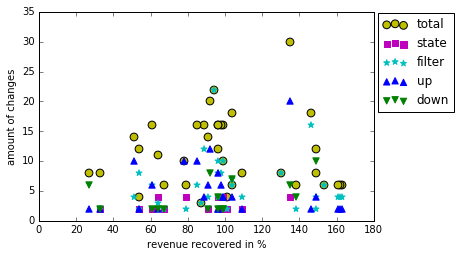

In [26]:
%matplotlib inline  
draw_change_plot(0, "rev_change_combined.pdf")

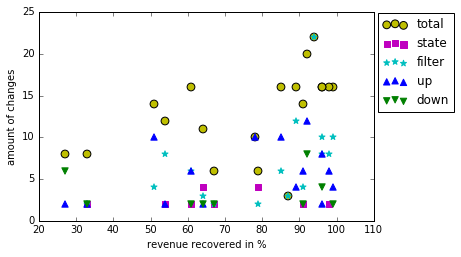

In [27]:
%matplotlib inline  
draw_change_plot(1,"rev_change_s1.pdf")

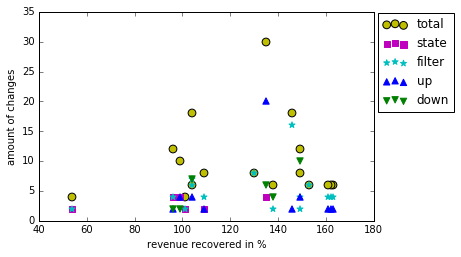

In [28]:
%matplotlib inline  
draw_change_plot(2,"rev_change_s2.pdf")

In [29]:
%matplotlib inline  
import matplotlib.pyplot as plt
from numpy import nan

def draw_rev_plot(net_type, filename=None):
    markers='o'

    if net_type > 0:
        res=[r for r in results if r['net_type'] == net_type]
    else:
        res=[r for r in results]
    
    res=[r for r in results if r['net_type'] == 1]
    x = [r['rev'] for r in res]
    y = [r['cost_ratio'] for r in res]

    res=[r for r in results if r['net_type'] == 2]
    x2 = [r['rev'] for r in res]
    y2 = [r['cost_ratio'] for r in res]
    
    size = 60
    colors = list("rgbcmyk")
    colors.pop()
    import itertools
    marker = itertools.cycle(markers)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)
    ax.set_xlabel('revenue compared to baseline %')
    ax.set_ylabel('costs compared to baseline in %')
    plt.scatter(x, y, c=colors.pop(), s=size, marker='o')
    plt.scatter(x2, y2, c=colors.pop(), s=size, marker='s')
    plt.legend(['scenario 1', 'scenario 2'], loc=2, bbox_to_anchor=(1.01,1) , borderaxespad=0.10)

    if filename: 
        plt.savefig(filename, format='pdf', transparent=True, bbox_inches = 'tight')
    plt.show()

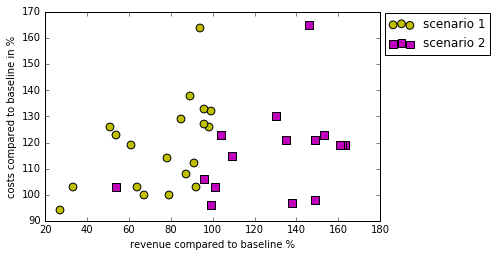

In [30]:
draw_rev_plot(0,"rev_costs_combined.pdf")

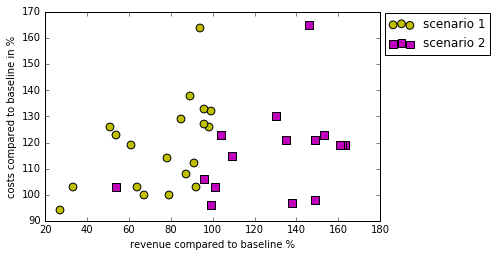

In [31]:
draw_rev_plot(1,"rev_costs_s1.pdf")

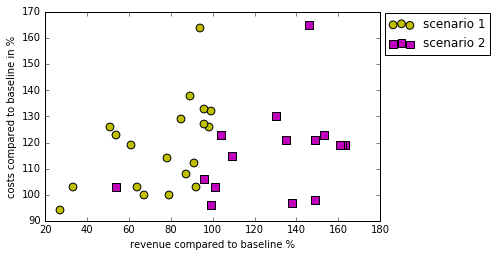

In [32]:
draw_rev_plot(2,"rev_costs_s1.pdf")

In [33]:
import numpy
from scipy.stats import pearsonr, f_oneway, linregress

res=[r for r in results if r['net_type'] == 1]
list1 = [r['rev'] for r in res]
list2 = [r['cost_ratio'] for r in res]
print("correlation 1:", pearsonr(list1, list2))


res=[r for r in results if r['net_type'] == 2]
list1 = [r['rev'] for r in res]
list2 = [r['cost_ratio'] for r in res]
print("correlation 2:", pearsonr(list1, list2))

res=[r for r in results]
list1 = [r['rev'] for r in res]
list2 = [r['cost_ratio'] for r in res]
print("correlation total:", pearsonr(list1, list2))

#res=[r for r in results]
res=[r for r in results if r['net_type'] == 2]
list1 = [float(r['revenue']) for r in res]
list2 = [r['counters']['filter_changes'] for r in res]

correlation 1: (0.51085907897094629, 0.025404248614261816)
correlation 2: (0.35577258599329892, 0.16106070016528645)
correlation total: (0.25350195594950686, 0.13574538904060257)


In [34]:
from results import *
from pprint import pprint
samples1=[]
samples2=[]
samples=samples1

for result in results:
    if 'samples' in result.keys():
        if result['_0_init'] == "2015-11-18T16:19:42.764Z":
            samples=samples2
        samples += result['samples']
print(len(samples))

samples1 = [float(s) for s in samples1]
samples2 = [float(s) for s in samples2 if int(float(s)) > 0]


234


187.513379


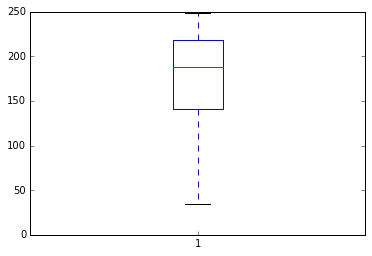

153.06495


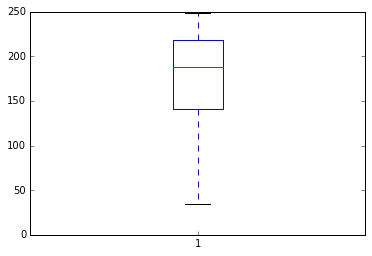

In [35]:
plt.figure()
from statistics import median, median_high
print(median_high(samples1))
plt.boxplot(samples1)
plt.show()
print(median(samples2))
plt.figure()
plt.boxplot(samples1)
plt.show()